# How are the technological hubs of manufacturing evolving in the world? An analysis on the rate of innovation. 
<h2 align="center"> Part 2: The Analysis</h2>

-----

### Description of Section: Statistics, Predictions and Visualisations

The goal of this project is to answer the following questions: 

#### 1. How innovative are countries? 

Innovation rate can be measured in a number of ways. To analyse it in this project, I will be using the number of patents filed by each country in the last ~50 years.

**The goal of this is to see how many innovative ideas companies and universities in each country files.**

The second step is then to analyse several indices provided by the world bank. These include variables such as % of GDP invested in R&D, number of articles and journals published, numer of technicians working in R&D, etc.  

From here I am hoping to create an **informative dashboard** with all necessary information to see how innovation is distributed. 

I also aim to formulate a **prediction as to which countries are expected to have the highest innovation rate.** 

> An extension on the research on the market analysis can be found under the [BONUS section](./03_BONUS.ipynb).



### This section will be structured as follows:

##### PART 1:
-  Q1.1: The evolution of number of patents by country - a world map
-  Q1.2:The evolution of the innovation rate indices by country - do we see some overall trends?
-  Q1.3: The set up of a hypothesis: causality between patent trends and chose innovation indices
-  Q1.4: The creation of a dashboard - what countries are the most interesting? 
    
    - Q1.4.1.: A prediction of growth


-----


In [1]:
# importing basic libraries needed: 

# for database manipulation
import pandas as pd
import numpy as np
import os
import datetime as dt

# for visualisations:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly_express as px

# for statistics
from scipy import stats
from sklearn import preprocessing

# libraries for machine learning will be imported throught the process to clarify what tools are being used at each step

In [2]:
# setting sns and matloplib styles
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1,  rc={"lines.linewidth": 1.5})

### Q1.1: The evolution of number of patents by country - a world map

In [3]:
# opening file
df = pd.read_csv("../00_data/00_clean_datasets/patents_by_country.csv")

In [4]:
# reading
df.head()

country code  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  \
0          ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1          AFG   0.0   0.0   1.0   2.0   3.0   0.0   1.0   2.0   1.0  ...   
2          AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3          ALB   6.0   0.0   0.0   0.0   0.0   0.0   1.0   3.0  13.0  ...   
4          AND   1.0   2.0   2.0   1.0   2.0   1.0   3.0   4.0   1.0  ...   

   2008  2009  2010  2011  2012  2013  2014  2015  2016   2017  
0   3.0   2.0   4.0   2.0   3.0   7.0   0.0   2.0   5.0    0.0  
1  73.0  37.0  29.0  17.0  22.0  49.0  54.0  84.0  79.0  100.0  
2   0.0   0.0   0.0   0.0   3.0   0.0   2.0   0.0   0.0    0.0  
3   0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   1.0    1.0  
4   7.0  15.0  14.0   3.0  15.0   6.0  18.0   6.0  12.0    5.0  

[5 rows x 39 columns]

In [5]:
# we need to transpose it to plot the data accordingly
dft = pd.read_csv("../00_data/00_clean_datasets/patents_by_country.csv", index_col="country code").transpose().reset_index()
dft = dft.rename(columns={"index":"year"})
dft.head()

country code  year  ABW  AFG  AGO  ALB  AND  ARE     ARG  ARM  ATG  ...   UKR  \
0             1980  0.0  0.0  0.0  6.0  1.0  1.0  1297.0  0.0  0.0  ...   1.0   
1             1981  0.0  0.0  0.0  0.0  2.0  2.0   863.0  0.0  0.0  ...   2.0   
2             1982  0.0  1.0  0.0  0.0  2.0  2.0   819.0  0.0  0.0  ...   4.0   
3             1983  0.0  2.0  0.0  0.0  1.0  2.0   588.0  0.0  0.0  ...  11.0   
4             1984  0.0  3.0  0.0  0.0  2.0  1.0   565.0  1.0  0.0  ...   5.0   

country code   URY      USA  UZB   VEN  VUT  WSM     ZAF  ZMB   ZWE  
0             12.0  88698.0  0.0  23.0  0.0  0.0   909.0  0.0   8.0  
1             10.0  88740.0  0.0  17.0  0.0  0.0  1065.0  4.0  17.0  
2             10.0  87908.0  0.0  28.0  0.0  0.0  1471.0  4.0  17.0  
3              6.0  84564.0  0.0  16.0  0.0  0.0  1381.0  0.0  25.0  
4              5.0  89118.0  0.0  16.0  1.0  0.0  1508.0  4.0  21.0  

[5 rows x 175 columns]

In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

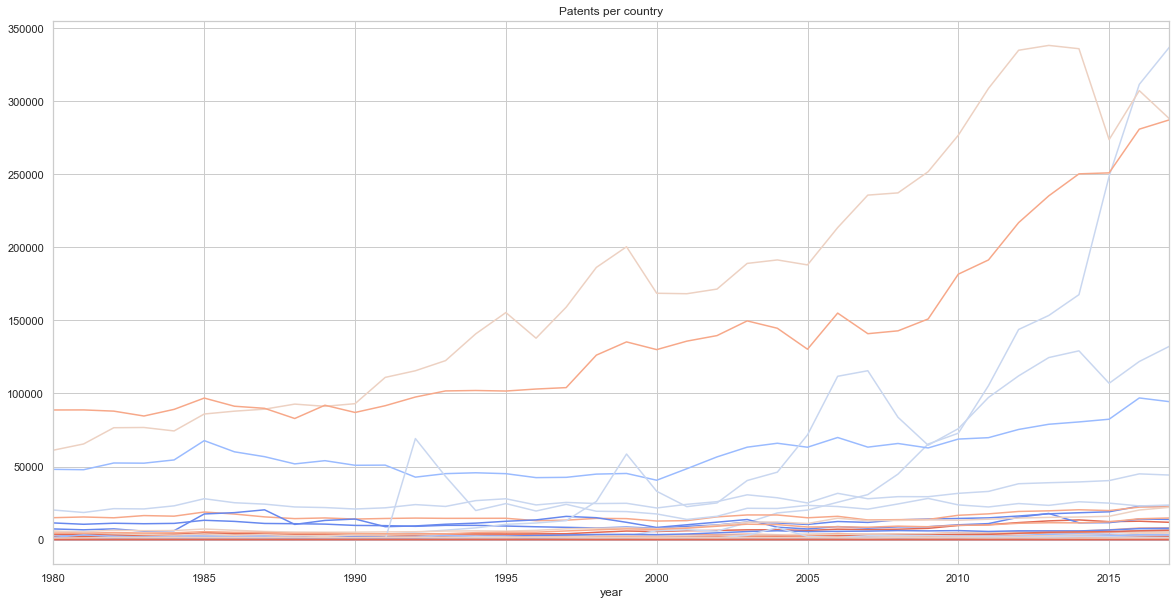

In [7]:
# multiple line plot
x = "year"
y = dft.columns.to_list()[1:]
dft.plot(x=x, y=y, figsize=(20,10), grid=True, title="Patents per country", legend=False)

From the graph we see there is a large differentiation between countries in the number of patents files as well as the growth. This was expected.

From here I draw the conlcusion that we somehow need to group the countries into subcategories to better analyse them. 

I also concluded that it might be best to actually do the maps to get an overall idear of how the patents are distributed. 

### Mapping
For the map I will need to import the geolocations. The table is saved outside of the repo. due to its size. 
I will be using the normal table, not the transposed one, and I will be adding the number of patents for every 10 years, so that I obtain 4 different graphs, which will show the changes over time for each country. 


In [8]:
# opening table
table = pd.read_csv("../../../Ice-cream-time.csv").drop(["Unnamed: 0", "Entity"], axis=1)

In [9]:
# rename column to merge on so its equal for both tables
table = table.rename(columns={"ADM0_A3":"country code"})

# merge
merge = df.merge(table, how="left", on="country code")

In [10]:
# sum every 10 years
df1 = merge.copy()
df1["80s"] = df1["1980"]+df1["1981"]+df1["1982"]+df1["1983"]+df1["1984"]+df1["1985"]+df1["1986"]+df1["1987"]+df1["1988"]+df1["1989"]
df1["90s"] = df1["1990"]+df1["1991"]+df1["1992"]+df1["1993"]+df1["1994"]+df1["1995"]+df1["1996"]+df1["1997"]+df1["1998"]+df1["1999"]
df1["00s"] = df1["2000"]+df1["2001"]+df1["2002"]+df1["2003"]+df1["2004"]+df1["2005"]+df1["2006"]+df1["2007"]+df1["2008"]+df1["2009"]
df1["10s"] = df1["2010"]+df1["2011"]+df1["2012"]+df1["2013"]+df1["2014"]+df1["2015"]+df1["2016"]+df1["2017"]

# save copy for later
df2 = df1.copy()

In [11]:
df1.head()

country code  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  \
0          ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1          AFG   0.0   0.0   1.0   2.0   3.0   0.0   1.0   2.0   1.0  ...   
2          AFG   0.0   0.0   1.0   2.0   3.0   0.0   1.0   2.0   1.0  ...   
3          AFG   0.0   0.0   1.0   2.0   3.0   0.0   1.0   2.0   1.0  ...   
4          AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

   2013  2014  2015  2016   2017  \
0   7.0   0.0   2.0   5.0    0.0   
1  49.0  54.0  84.0  79.0  100.0   
2  49.0  54.0  84.0  79.0  100.0   
3  49.0  54.0  84.0  79.0  100.0   
4   0.0   2.0   0.0   0.0    0.0   

                                            geometry   80s   90s    00s    10s  
0                                                NaN   0.0  11.0   34.0   23.0  
1  POLYGON ((6582456.832056317 3959190.645703076,...  17.0  67.0  269.0  434.0  
2  POLYGON ((6582456.832056317 3959190.645703076,...  17.0  67.0  269.0  434.0  
3  POLYGON ((6582456.832056317 3959190.645703076,...  17.0  67.0  269.0  434.0  
4  MULTIPOLYGON (((1233646.001965952 -495756.6456...   0.0   0.0    0.0    5.0  

[5 rows x 44 columns]

In [12]:
# limit max number of patents to 350k for 80s
def max80(s):
    if s>100000:
        return 100000
    else:
        return s
df1["80s"] = df1["80s"].apply(max80)

# limit max number of patents to 450k for 90s
def max90(s):
    if s>250000:
        return 250000
    else:
        return s
df1["90s"] = df1["90s"].apply(max90)


#  limit max number of patents to 550k for 00s
def max00(s):
    if s>250000:
        return 250000
    else:
        return s
df1["00s"] = df1["00s"].apply(max00)

#  limit max number of patents to 650k for 10s
def max10(s):
    if s>250000:
        return 250000
    else:
        return s
df1["10s"] = df1["10s"].apply(max10)

In [13]:
# creating the world map for 80s
fig = px.choropleth(df1, locations='country code', color="80s", hover_name="country code", color_continuous_scale=px.colors.sequential.Sunset,  title="Patents map 80s")

In [14]:
fig.show()

In [15]:
# creating the world map for 90s
fig = px.choropleth(df1, locations='country code', color="90s", hover_name="country code", color_continuous_scale=px.colors.sequential.Sunset, title="Patents map 90s")

In [16]:
fig.show()

In [17]:
# creating the world map for 00s
fig = px.choropleth(df1, locations='country code', color="00s", hover_name="country code", color_continuous_scale=px.colors.sequential.Sunset,  title="Patents map 2000s")

In [18]:
fig.show()

In [19]:
# creating the world map for 10s
fig = px.choropleth(df1, locations='country code', color="10s", hover_name="country code", color_continuous_scale=px.colors.sequential.Sunset,  title="Patents map 2010s")

In [20]:
fig.show()

What we see is a clear trend in growth in East Asia, as well as Europe and the States. This comes to no surprise as these countries are known for their extreme growth. 
Although some trends can be seen, we need to further analyse this data to see more results. 
For this, I will continue with the next data set, which will allow me a in depth analysis of teh development.

##### bonus (continued research on DF):
1. order in desc. order - plot top 15 
2. calculate difference btw years/ growth and analyse growth btw years

In [21]:
# define dataframe with info we need
df2 = df2[["country code", "80s", "90s", "00s", "10s"]]
df2.head()

country code   80s   90s    00s    10s
0          ABW   0.0  11.0   34.0   23.0
1          AFG  17.0  67.0  269.0  434.0
2          AFG  17.0  67.0  269.0  434.0
3          AFG  17.0  67.0  269.0  434.0
4          AGO   0.0   0.0    0.0    5.0

In [22]:
# remove repeated countries (from merge into geoplots)
df2 = df2.groupby("country code").first()

# sort values by max patents in last 7 years
df_top = df2.sort_values("10s", ascending=False)

# select top countries 
df_top = df_top.head(6).transpose().reset_index()
df_top

country code index        JPN        USA        CHN       KOR       DEU  \
0              80s   801242.0   891771.0      401.0    7493.0  545433.0   
1              90s  1421701.0  1050140.0    12684.0  145835.0  455566.0   
2              00s  2014809.0  1419667.0   235062.0  614501.0  599691.0   
3              10s  2463349.0  1894470.0  1540056.0  900050.0  647010.0   

country code       FRA  
0             225734.0  
1             242594.0  
2             274402.0  
3             310742.0

Text(0.5, 0, 'Year')

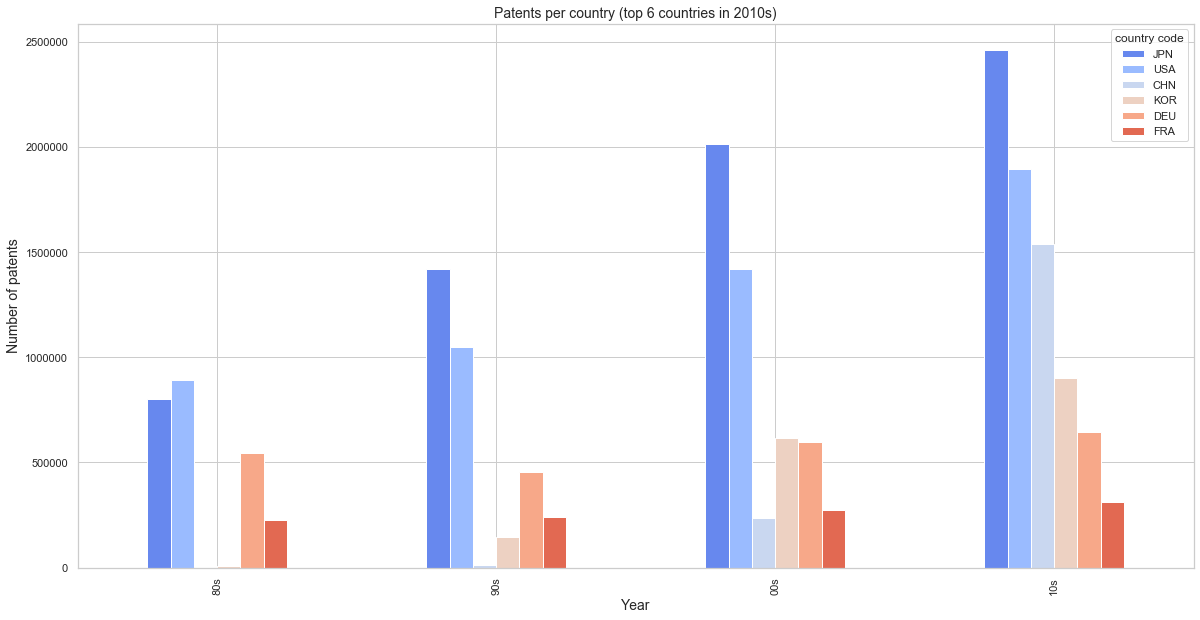

In [23]:
# plot graph of development of top countries
x = "index"
y = df_top.columns.to_list()[1:]
df_top.plot.bar(x=x, y=y, figsize=(20,10), grid=True, legend=True)
plt.title('Patents per country (top 6 countries in 2010s)', fontsize=14)
plt.ylabel("Number of patents", fontsize=14)
plt.xlabel('Year', fontsize=14)

In [24]:
# vs. top countries is the 80s
# sort values by max patents in last 7 years
df_top80 = df2.sort_values("80s", ascending=False)

# select top countries 
df_top80 = df_top80.head(6).transpose().reset_index()
df_top80

country code index        USA        JPN       DEU       FRA       GBR  \
0              80s   891771.0   801242.0  545433.0  225734.0  158896.0   
1              90s  1050140.0  1421701.0  455566.0  242594.0  141988.0   
2              00s  1419667.0  2014809.0  599691.0  274402.0  146638.0   
3              10s  1894470.0  2463349.0  647010.0  310742.0  158142.0   

country code       CHE  
0             113172.0  
1              90760.0  
2             112265.0  
3             146203.0

Text(0.5, 0, 'Year')

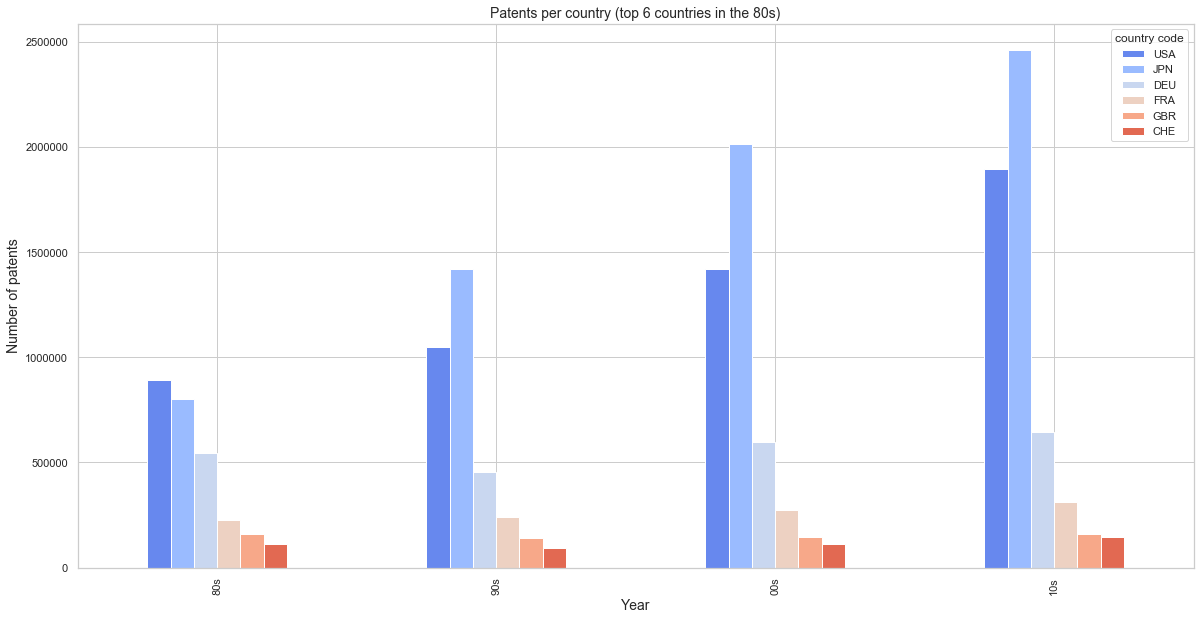

In [25]:
# plot graph of development of top countries
x = "index"
y = df_top80.columns.to_list()[1:]
df_top80.plot.bar(x=x, y=y, figsize=(20,10), grid=True, legend=True)
plt.title('Patents per country (top 6 countries in the 80s)', fontsize=14)
plt.ylabel("Number of patents", fontsize=14)
plt.xlabel('Year', fontsize=14)

We see newcomers! in the 80s no one thought KR, CN, would grow to become top 6.

The next step now would be to check for max. growth rate.


In [26]:
# transpose data to get % growth of each coutnry
df_diff_calc = df2.transpose().reset_index()
df_diff_calc.head()

country code index   ABW    AFG  AGO   ALB   AND    ARE     ARG    ARM   ATG  \
0              80s   0.0   17.0  0.0  23.0  20.0   15.0  4519.0    1.0   0.0   
1              90s  11.0   67.0  0.0   7.0  32.0   23.0  2212.0  238.0  11.0   
2              00s  34.0  269.0  0.0   4.0  66.0  154.0   739.0  258.0  15.0   
3              10s  23.0  434.0  5.0   6.0  79.0  672.0  1005.0  190.0  18.0   

country code  ...      UKR    URY        USA    UZB    VEN   VUT    WSM  \
0             ...     43.0   57.0   891771.0    0.0  380.0   1.0    0.0   
1             ...   7291.0   58.0  1050140.0  802.0  802.0  14.0    0.0   
2             ...  25131.0   95.0  1419667.0  199.0  349.0  29.0   15.0   
3             ...  15403.0  128.0  1894470.0   84.0  224.0  10.0  202.0   

country code      ZAF   ZMB    ZWE  
0             13857.0  27.0  262.0  
1             14200.0  44.0  190.0  
2             12364.0  25.0   32.0  
3              8716.0   2.0   11.0  

[4 rows x 175 columns]

##### BONUS: to correct, if time

>#### create new df to fill
```for i in df_diff_calc.columns.to_list()[1:]:
    df_diff[i]=0```
>##### fill values with % growth 
```for i in df_diff_calc.columns.to_list()[1:]:
    df_diff[i] = df_diff_calc[i].pct_change()```
    
>##### removing nans and infinite values
```df_diff.fillna(0, inplace=True)
df_diff.replace([np.inf, -np.inf], 0, inplace=True)
df_diff```

>#### find max growth for last 10 years, then plot
```lst = df_diff.transpose().sort_values(by=3, ascending=False).head(5).reset_index()["country code"].to_list()
df_diff=df_diff_calc[lst].reset_index()```


>#### plot graph of development of top countries
```x = "index"
y = df_diff.columns.to_list()[1:]
fig = df_diff.plot(x=x, y=y, figsize=(20,10), grid=True, title="Countries with max growth % in the last 10 years in number of patents", legend=True, linewidth=2)```

### Q1.2:The evolution of the innovation rate indices by country - overall trends
Start the analysis with a analysis on only one country at a time. 

It is important to notice that this data is **panel data**. 



#### First, make sure that the format is correct

In [27]:
# opening file
df = pd.read_csv("../00_data/00_clean_datasets/Q1/innovation_markers.csv", index_col=0)

In [28]:
# read file
df.head()

country                                          indicator  1991  1992  \
0      ABW  High-technology exports (% of manufactured exp...   NaN   NaN   
1      ABW              High-technology exports (current US$)   NaN   NaN   
12     ABW  Charges for the use of intellectual property, ...   NaN   NaN   
22     AFG          Scientific and technical journal articles   NaN   NaN   
25     AFG  Charges for the use of intellectual property, ...   NaN   NaN   

    1993  1994  1995  1996  1997  1998  ...         2008          2009  \
0    NaN   NaN   NaN   NaN   NaN   NaN  ...          NaN  3.213858e+00   
1    NaN   NaN   NaN   NaN   NaN   NaN  ...    141337.00  8.668620e+05   
12   NaN   NaN   NaN   NaN   NaN   NaN  ...  11955307.26  1.318436e+07   
22   NaN   NaN   NaN   NaN   NaN   NaN  ...        12.50  2.330000e+01   
25   NaN   NaN   NaN   NaN   NaN   NaN  ...    308406.50  9.476112e+04   

            2010          2011          2012          2013          2014  \
0   3.292313e+00  4.052655e+00  1.024010e+01  4.915729e+00  5.449211e+00   
1   5.605380e+05  1.073498e+06  3.325655e+06  1.627152e+06  1.663353e+06   
12  1.474860e+07  1.055866e+07  9.720670e+06  8.645173e+06  1.090319e+07   
22  3.390000e+01  4.270000e+01  3.500000e+01  2.730000e+01  3.330000e+01   
25  2.757785e+07  4.708426e+07  1.073803e+07  1.094402e+07  1.078901e+05   

            2015          2016          2017  
0   4.694768e+00  3.758736e+00  5.380172e+00  
1   1.194859e+06  1.158612e+06  1.654810e+06  
12  1.381022e+07  1.632750e+07           NaN  
22  2.350000e+01  8.040000e+01           NaN  
25  2.424755e+05  3.680295e+04  1.806604e+05  

[5 rows x 29 columns]

In [29]:
# group and trnaspose to make into pivot table
df = df.groupby(["country", "indicator"]).sum()
dft = df.transpose()

In [30]:
# change index into datetime for time series
dft.index = pd.to_datetime(dft.index)
type(dft.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [31]:
# check for correct formatting
type(dft.columns)

pandas.core.indexes.multi.MultiIndex

In [32]:
# check for correct formatting
dft.columns.names

FrozenList(['country', 'indicator'])

#### Check some overall trends
*overall changes in the world (sum of all countries)*

In [33]:
# data aggregation
dft_sum = dft.sum(level='indicator', axis=1)

In [34]:
dft_sum.head()

indicator   Charges for the use of intellectual property, payments (BoP, current US$)  \
1991-01-01                                       1.857145e+11                           
1992-01-01                                       1.981706e+11                           
1993-01-01                                       1.989969e+11                           
1994-01-01                                       2.308772e+11                           
1995-01-01                                       2.764504e+11                           

indicator   High-technology exports (% of manufactured exports)  \
1991-01-01                                         811.567787     
1992-01-01                                         943.765092     
1993-01-01                                        1063.703859     
1994-01-01                                        1276.522993     
1995-01-01                                        1264.272639     

indicator   High-technology exports (current US$)  \
1991-01-01                           8.863176e+11   
1992-01-01                           1.682898e+12   
1993-01-01                           1.705305e+12   
1994-01-01                           1.986574e+12   
1995-01-01                           2.432693e+12   

indicator   Scientific and technical journal articles  \
1991-01-01                                        0.0   
1992-01-01                                        0.0   
1993-01-01                                        0.0   
1994-01-01                                        0.0   
1995-01-01                                        0.0   

indicator   Charges for the use of intellectual property, receipts (BoP, current US$)  \
1991-01-01                                       1.845113e+11                           
1992-01-01                                       2.133644e+11                           
1993-01-01                                       2.232909e+11                           
1994-01-01                                       2.690418e+11                           
1995-01-01                                       3.054596e+11                           

indicator   Patent applications, nonresidents  \
1991-01-01                          1582806.0   
1992-01-01                          1842778.0   
1993-01-01                          1795356.0   
1994-01-01                          1934951.0   
1995-01-01                          2212616.0   

indicator   Trademark applications, direct nonresident  \
1991-01-01                                   2660343.0   
1992-01-01                                   3416090.0   
1993-01-01                                   4430471.0   
1994-01-01                                   4963504.0   
1995-01-01                                   5344730.0   

indicator   Trademark applications, direct resident  \
1991-01-01                                6189365.0   
1992-01-01                                7016063.0   
1993-01-01                                7779590.0   
1994-01-01                                8794478.0   
1995-01-01                                9388471.0   

indicator   Trademark applications, total  Patent applications, residents  \
1991-01-01                     10060075.0                       3425145.0   
1992-01-01                     11725686.0                       4115666.0   
1993-01-01                     13271681.0                       4258907.0   
1994-01-01                     14192149.0                       4120650.0   
1995-01-01                     15196884.0                       4390327.0   

indicator   Research and development expenditure (% of GDP)  \
1991-01-01                                              0.0   
1992-01-01                                              0.0   
1993-01-01                                              0.0   
1994-01-01                                              0.0   
1995-01-01                                              0.0   

indicator   Researchers in R&D (per million peop


Try to normalise some extreme values in order for the scaling to work better in the regression
As we have some percentages, try putting all/ most between 1 and 100


columns to change: 
    - "High-technology exports" (current US$) (/10 000 - change name to (in 10 000US$)
    - "Charges for the use of intellectual property, payments (BoP, current US$)" (/100 00 - change name to (in 100 000US$)
    - "Researchers in R&D (per million people)" (/1000 - per per thousand million people)
    - "Technicians in R&D (per million people)"(/1000 - per per thousand million people)

In [35]:
dft_sum['High-technology exports (current US$)'] = dft_sum['High-technology exports (current US$)']/10000
dft_sum['Charges for the use of intellectual property, payments (BoP, current US$)'] = dft_sum['Charges for the use of intellectual property, payments (BoP, current US$)']/100000
dft_sum['Researchers in R&D (per million people)'] = dft_sum['Researchers in R&D (per million people)']/1000
dft_sum['Technicians in R&D (per million people)'] = dft_sum['Technicians in R&D (per million people)']/1000

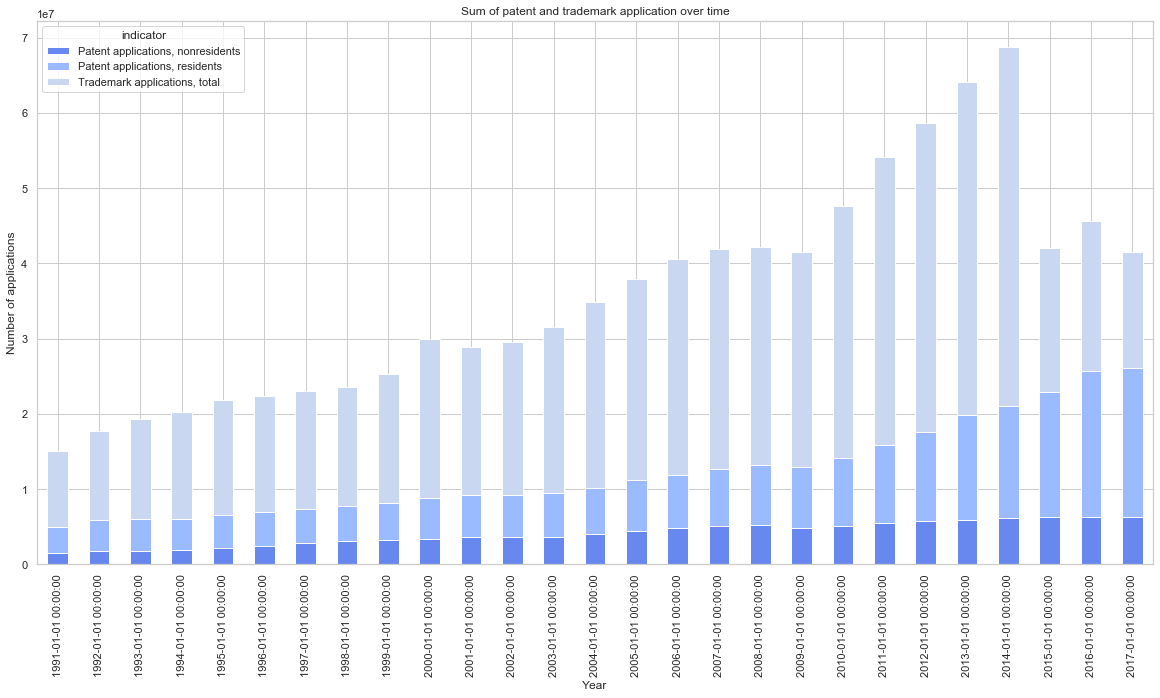

In [36]:
# overall changes in sum of patents
# data selection                                               
indicator = dft_sum[["Patent applications, nonresidents", 
                                               "Patent applications, residents",                                               
                                               "Trademark applications, total"
                                               ]]

# plotting 
indicator.plot.bar(figsize=(20,10), grid=True, legend=True, stacked=True)

# plot formatting
plt.title('Sum of patent and trademark application over time')
plt.ylabel("Number of applications", fontsize=12)
plt.xlabel('Year')

# show
plt.show()

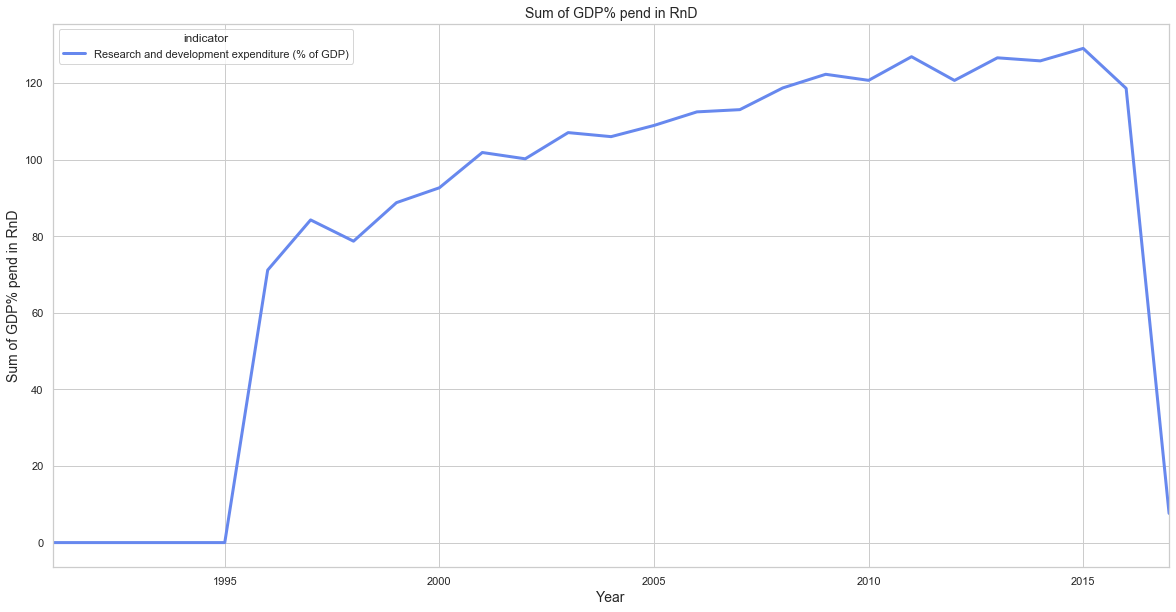

In [37]:
# overall changes in expenditure
# data selection                                               
indicator_1 = dft_sum[["Research and development expenditure (% of GDP)"]]

# plotting 
indicator_1.plot(figsize=(20,10), grid=True, legend=True, linewidth=3)

# plot formatting
plt.title('Sum of GDP% pend in RnD', fontsize=14)
plt.ylabel("Sum of GDP% pend in RnD", fontsize=14)
plt.xlabel('Year', fontsize=14)

# show
plt.show()

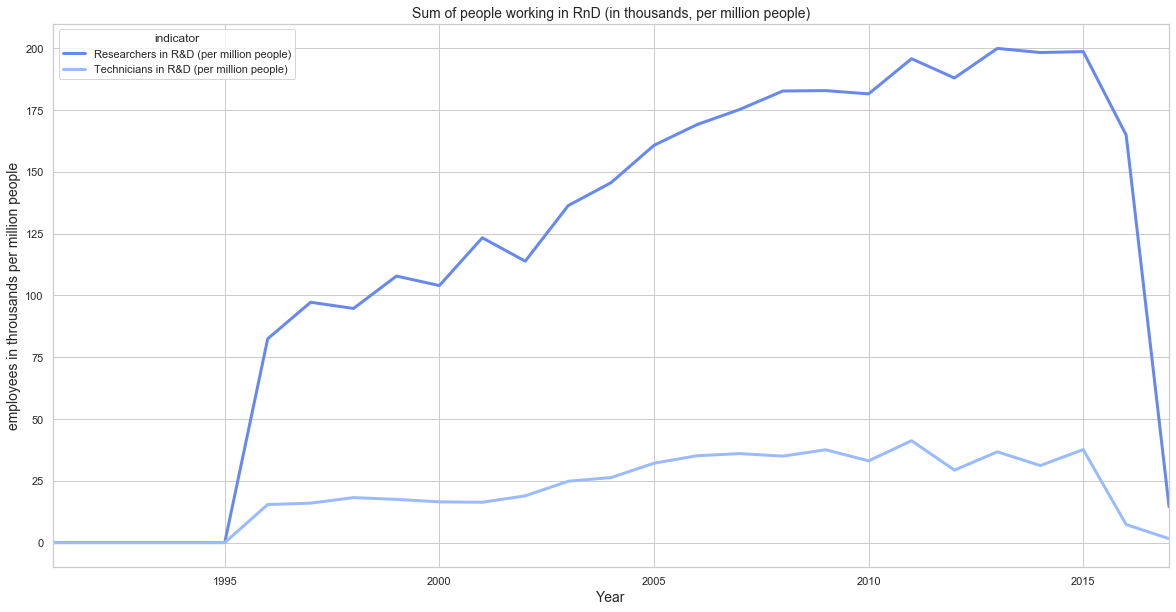

In [38]:
# overall changes in sum of researchers
# data selection                                               
indicator_2 = dft_sum[["Researchers in R&D (per million people)", 
                                               "Technicians in R&D (per million people)",                                               
                                               ]]

# plotting 
indicator_2.plot(figsize=(20,10), grid=True, legend=True, linewidth=3)

# plot formatting
plt.title('Sum of people working in RnD (in thousands, per million people)', fontsize=14)
plt.ylabel("employees in throusands per million people", fontsize=14)
plt.xlabel('Year', fontsize=14)

# show
plt.show()

From this data, we can already suspect some trends. If we look closely, the peak and valleys of the graphs of the sum of indices are similar thorugh all graphed indicators. 

Text(0.5, 0, 'Year')

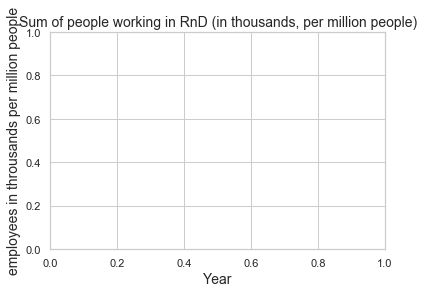

In [39]:
# relationships for large numbers
#sns.pairplot(dft_sum, palette="husl", diag_kind="kde", markers="+")
plt.title('Sum of people working in RnD (in thousands, per million people)', fontsize=14)
plt.ylabel("employees in throusands per million people", fontsize=14)
plt.xlabel('Year', fontsize=14)
# we see that most variables have a more or less linear relationship! 

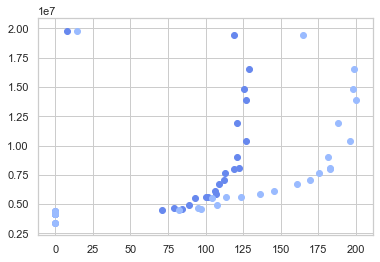

In [40]:
# some plots: 

# RnD expenditure to Patent application
plt.scatter(dft_sum["Research and development expenditure (% of GDP)"], dft_sum['Patent applications, residents'], )


# Patents application to number of people working in the field
plt.scatter(dft_sum["Researchers in R&D (per million people)"], dft_sum['Patent applications, residents'], )


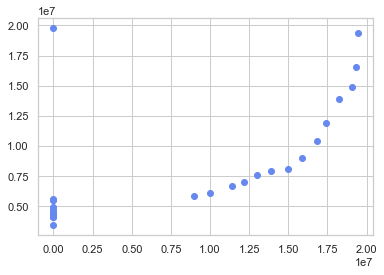

In [41]:
# patent applications to scientific journals
plt.scatter(dft_sum["Scientific and technical journal articles"], dft_sum['Patent applications, residents'], )


### Q1.3: The set up of a hypothesis: realtionhsips between patent applicaitons and indicators and chooseing of variables

For this part of the project, I will make the following assumption:
<h5 align="center"> Innovation is directly linked with the number of patents applied for in each country </h5>

This means that I can look for a relationship between innovation (patent application or resdents and non residents) and the other indicators to make a prediction of which countries' innovation rate will continue growing. 

For this I will start looking at correlations between variables, follwed by a PanelOLS to see the relaitonship between variables. From here, grouping the countries by either location or income level (Depending on seen corrrealtions), I will perform a prediciton on the innovation rate and define the most innovative countries/regions.


See [documentation on modeling](https://bashtage.github.io/linearmodels/doc/panel/models.html#linearmodels.panel.model.PooledOLS)

See [documentation on working with panel data](https://pandas.pydata.org/pandas-docs/version/0.24/reference/panel.html)

In [42]:
# to change index to year, country
# put country down from MultiIndex
dft_indicator = dft.stack(level='country')

# reset index to have year as variable not index
dft_indicator = dft_indicator.reset_index()

# change name for better understanding
dft_indicator = dft_indicator.rename(columns={"level_0":"year"})

# change type of date to int
dft_indicator.year = pd.to_datetime(dft_indicator.year)

# addition of all patents and trademarks as innovaiton measure - dependable variable
dft_indicator["Patent and trademark applications"] = dft_indicator[["Patent applications, nonresidents", 
                                                                   "Trademark applications, total", 
                                                                   "Patent applications, residents"]].sum(axis=1)

In [43]:
# drop variables that are no longer needed: 
dft_indicator.drop(["Patent applications, nonresidents", 
                    "Trademark applications, direct nonresident", 
                    "Trademark applications, direct resident", 
                    "Trademark applications, total", 
                    "Patent applications, residents"
                   ], axis=1, inplace=True)

In [44]:
# put year and coutnry as index for modeling
OLS_data = dft_indicator.set_index(['country', 'year'])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

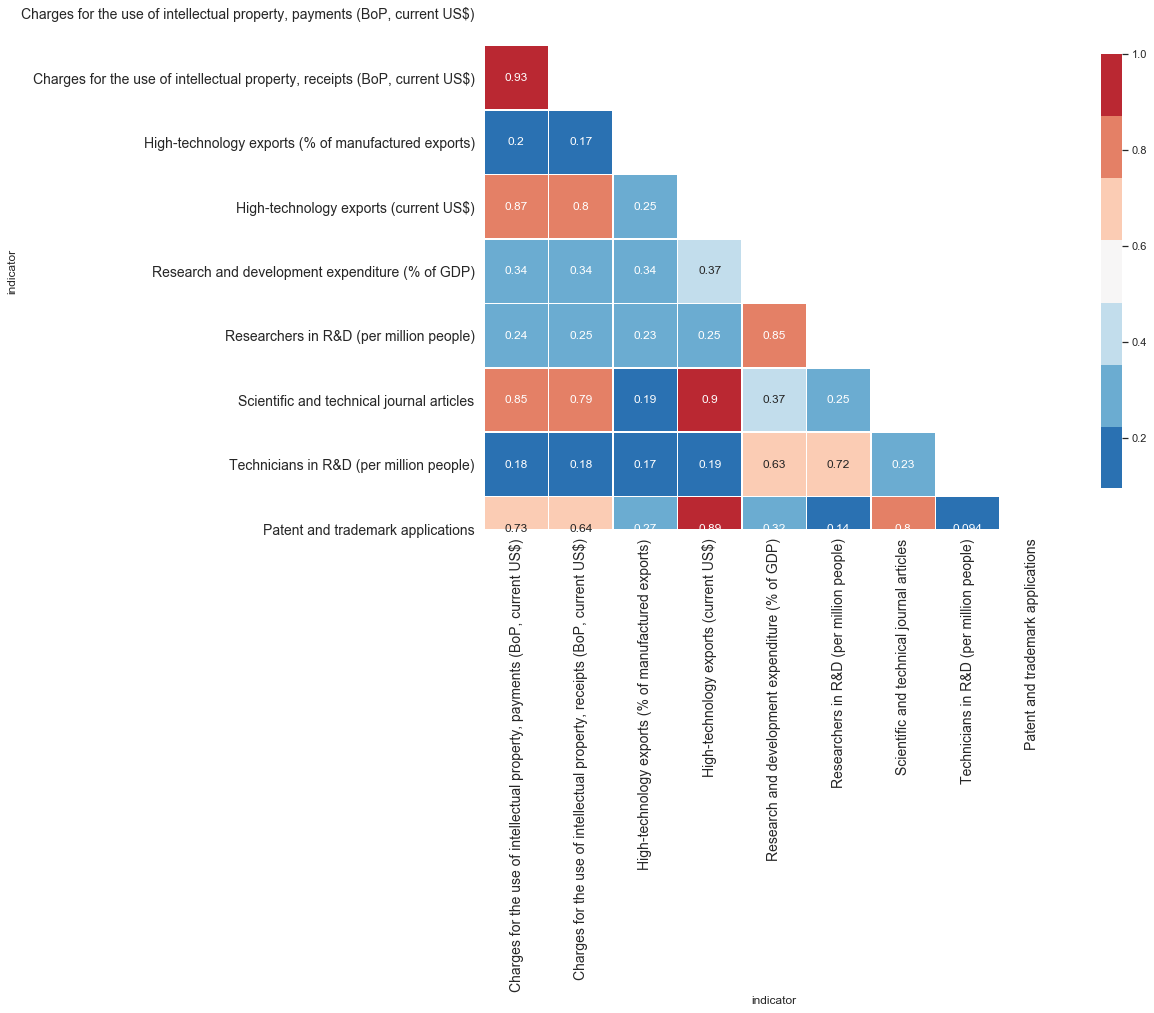

In [45]:
# check for correlation to reduce variables 
mask = np.zeros_like(OLS_data.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13, 16))

cmap = sns.color_palette("RdBu_r", 7)

sns.heatmap(OLS_data.corr(), annot=True, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=360, fontsize=14)

plt.xticks(rotation=90, fontsize=14)

In [46]:
# variables with a correaltion of over 0.9 will be discarded.
# 'Charges for the use of intellectual property, receipts (BoP, current US$)' and 'Charges for the use of intellectual property, payments (BoP, current US$)'
OLS_data.drop("Charges for the use of intellectual property, receipts (BoP, current US$)", axis=1, inplace=True)

> **BONUS: check for covariance:** <br>
>improt library: ```from linearmodels.panel.model import HomoskedasticCovariance```

> define x,y, entity, time <br>
```dependent = OLS_data['Patent and trademark applications']```
<br>
```exog = OLS_data[['Charges for the use of intellectual property, payments (BoP, current US$)',
                 'High-technology exports (current US$)',   
                 'Scientific and technical journal articles',
                 'Technicians in R&D (per million people)', 
                 'Research and development expenditure (% of GDP)', 
                 'High-technology exports (current US$)', 
                 'Scientific and technical journal articles']]```



> add: model , entity_ids=True, time_ids=True <br>
```HomoskedasticCovariance(dependent, exog, ).fit(debiased=True)```

### Panel OLS
How do the indicators in the table affect innovaiton from the prespective of the entity (coutntry).
I will carry out this analysis to late be able to perform a prediction of the innovation rate for the different groups of countries (high income, middle income, low income || by region).

```PanelOLS``` uses fixed effect (i.e., entity effects) to eliminate the entity specific components. This is mathematically equivalent to including a dummy variable for each entity, although the implementation does not do this for performance reasons.

```PanelOLS``` is somewhat more general than the other estimators and can be used to model 2 effects (e.g., entity and time effects).

This model estimates a fixed effect regression on a panel of the indices of innovation for each country. 

>The model will drop not full rows, however we are still looking at 97 countries over a span of 27 time periods.

In [47]:
# import library:
from linearmodels import PanelOLS

# define dependent and variable
dependent = OLS_data["Patent and trademark applications"]
exog = OLS_data[['Charges for the use of intellectual property, payments (BoP, current US$)',
                 'High-technology exports (current US$)',   
                'Scientific and technical journal articles',
                ]]

# PanelOLS function
PanelOLS(dependent, exog, entity_effects=True, time_effects=True).fit(debiased=True)

C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\linearmodels\utility.py:478: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



PanelOLS Estimation Summary                                  
===============================================================================================
Dep. Variable:     Patent and trademark applications   R-squared:                        0.5515
Estimator:                                  PanelOLS   R-squared (Between):              0.6796
No. Observations:                               4482   R-squared (Within):               0.5734
Date:                               Wed, Aug 21 2019   R-squared (Overall):              0.6629
Time:                                       18:52:21   Log-likelihood                -6.016e+04
Cov. Estimator:                           Unadjusted                                           
                                                       F-statistic:                      1757.1
Entities:                                        166   P-value                           0.0000
Avg Obs:                                      27.000   Distribution:                  F(3,4287)
Min Obs:                                      27.000                                           
Max Obs:                                      27.000   F-statistic (robust):             1757.1
                                                       P-value                           0.0000
Time periods:                                     27   Distribution:                  F(3,4287)
Avg Obs:                                      166.00                                           
Min Obs:                                      166.00                                           
Max Obs:                                      166.00                                           
                                                                                               
                                                             Parameter Estimates                                                             
=============================================================================================================================================
                                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------------------------------------------------------
Charges for the use of intellectual property, payments (BoP, current US$) -1.491e-06  2.028e-07    -7.3537     0.0000  -1.888e-06  -1.093e-06
High-technology exports (current US$)                                        1.7e-06  4.379e-08     38.832     0.0000   1.614e-06   1.786e-06
Scientific and technical journal articles                                     0.2257     0.0379     5.9548     0.0000      0.1514      0.3000
=============================================================================================================================================

F-test for Poolability: 44.527
P-value: 0.0000
Distribution: F(191,4287)

Included effects: Entity, Time
PanelEffectsResults, id: 0x1d20289b9e8

From this Summary we can see that the ```F-Statistic``` is quite high, and we have an OK ```R-squared``` value at 0.71. This mend that together, my variables explain 71% of the data. 
The parameter estimates show that the probability  is 0.00 and smaller than the alpha value = 0.05, therefore we can say that the parameters are significant to the develeopment of our dependable variabe.  
With this we can reject the null hypotheses and at least one coefficient will be different from 0 in a Linear Regression Model. 

To reach this,I have carried out two iterations, in each I have dropped a variable as the p-value greater than alpha, and therefore they can be removed from the model. 

I have removed the varibales in ```iteration 1``` and ```iteration 1```: 
- ```High-technology exports (% of manufactured exports)```
- ```Research and development expenditure (% of GDP)```


In [48]:
# other varibales (these variables could not be added to the previous regression as an error came up.)
# When we carry out the OLS, we see that the R2 value is extremely low, so we might as well drop them out of cosideration when doing the regression.

# Define dependent and variables
dependent = OLS_data["Patent and trademark applications"]
exog = OLS_data[['Researchers in R&D (per million people)',
                 'Technicians in R&D (per million people)'
                ]]

# PanelOLS function
PanelOLS(dependent, exog, entity_effects=True, time_effects=True).fit(debiased=True)

PanelOLS Estimation Summary                                  
===============================================================================================
Dep. Variable:     Patent and trademark applications   R-squared:                        0.0077
Estimator:                                  PanelOLS   R-squared (Between):              0.0246
No. Observations:                               1782   R-squared (Within):               0.0267
Date:                               Wed, Aug 21 2019   R-squared (Overall):              0.0247
Time:                                       18:52:21   Log-likelihood                 -2.11e+04
Cov. Estimator:                           Unadjusted                                           
                                                       F-statistic:                      6.5689
Entities:                                         66   P-value                           0.0014
Avg Obs:                                      27.000   Distribution:                  F(2,1688)
Min Obs:                                      27.000                                           
Max Obs:                                      27.000   F-statistic (robust):             6.5689
                                                       P-value                           0.0014
Time periods:                                     27   Distribution:                  F(2,1688)
Avg Obs:                                      66.000                                           
Min Obs:                                      66.000                                           
Max Obs:                                      66.000                                           
                                                                                               
                                            Parameter Estimates                                            
===========================================================================================================
                                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------------
Researchers in R&D (per million people)     3.8997     1.1007     3.5430     0.0004      1.7409      6.0585
Technicians in R&D (per million people)    -7.2946     2.7553    -2.6475     0.0082     -12.699     -1.8905
===========================================================================================================

F-test for Poolability: 365.38
P-value: 0.0000
Distribution: F(91,1688)

Included effects: Entity, Time
PanelEffectsResults, id: 0x1d2029203c8

### BetweenOLS
```BetweenOLS``` averages within an entity and then regresses the time-averaged values using OLS. It is particular simple since it first computes the time averages of y and x and then runs a simple regression using these averages.

This can be used to check that my assumption that the dependant variable ```Patent and trademark applications``` is not wrong, as it gives us the realtionship of parameters over time for all observations. 

If the ```R-squared``` is high, it indicates htat the variables represent 92% of the data. 

We see that the R squared value is very high, at 0.92.

In [49]:
# import libraries
from linearmodels import BetweenOLS

# define x and y:
dependent = OLS_data["Patent and trademark applications"]
exog = OLS_data[['Charges for the use of intellectual property, payments (BoP, current US$)',
                 'High-technology exports (current US$)',   
                 'Scientific and technical journal articles',
                 'Technicians in R&D (per million people)', 
                 'Research and development expenditure (% of GDP)'
                ]]
# 'Researchers in R&D (per million people)',
#'High-technology exports (% of manufactured exports)'

BetweenOLS(dependent, exog).fit(debiased=True)

BetweenOLS Estimation Summary                                 
===============================================================================================
Dep. Variable:     Patent and trademark applications   R-squared:                        0.9376
Estimator:                                BetweenOLS   R-squared (Between):              0.9376
No. Observations:                                 56   R-squared (Within):              -23.587
Date:                               Wed, Aug 21 2019   R-squared (Overall):             -0.0689
Time:                                       18:52:21   Log-likelihood                   -681.46
Cov. Estimator:                           Unadjusted                                           
                                                       F-statistic:                      153.36
Entities:                                         56   P-value                           0.0000
Avg Obs:                                      27.000   Distribution:                    F(5,51)
Min Obs:                                      27.000                                           
Max Obs:                                      27.000   F-statistic (robust):             153.36
                                                       P-value                           0.0000
Time periods:                                     27   Distribution:                    F(5,51)
Avg Obs:                                      56.000                                           
Min Obs:                                      56.000                                           
Max Obs:                                      56.000                                           
                                                                                               
                                                             Parameter Estimates                                                             
=============================================================================================================================================
                                                                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------------------------------------------------------
Charges for the use of intellectual property, payments (BoP, current US$) -2.132e-06  1.652e-06    -1.2908     0.2026  -5.449e-06   1.184e-06
High-technology exports (current US$)                                     -4.465e-07  3.661e-07    -1.2197     0.2282  -1.181e-06   2.884e-07
Scientific and technical journal articles                                     3.4798     0.4397     7.9133     0.0000      2.5970      4.3626
Technicians in R&D (per million people)                                      -119.89     29.287    -4.0936     0.0002     -178.68     -61.091
Research and development expenditure (% of GDP)                            9.322e+04  1.605e+04     5.8098     0.0000   6.101e+04   1.254e+05
=============================================================================================================================================
PanelResults, id: 0x1d202941518

##### As we will do a time prediction, we might as well use this model and use these variables to analyse the regression. 
the best variables to use for the regression therefore are:

```Research and development expenditure (% of GDP)```

```Technicians in R&D (per million people)```

```Scientific and technical journal articles```


### Q1.4: The creation of a dashboard - what countries are the most interesting?

### Country groupation- how should we group?
##### 1. try correlations

In [50]:
# stack by country
df_country = dft.stack(level=1)
# see correaltions:
df_country.corr().head()

country       ABW       AFG       AGO       ALB       AND       ARB       ARE  \
country                                                                         
ABW      1.000000  0.364839  0.423774  0.787652  0.171712  0.112371  0.263030   
AFG      0.364839  1.000000  0.089665  0.353095  0.671391  0.270009  0.871447   
AGO      0.423774  0.089665  1.000000  0.216914  0.839334  0.315311  0.976789   
ALB      0.787652  0.353095  0.216914  1.000000  0.661017  0.325977  0.456194   
AND      0.171712  0.671391  0.839334  0.661017  1.000000  0.847053  0.333327   

country       ARG       ARM       ATG  ...       VEN       VNM       VUT  \
country                                ...                                 
ABW      0.637872  0.345384  0.581392  ...  0.836585  0.306244  0.093069   
AFG      0.467844  0.798624  0.160455  ...  0.438399  0.910465  0.363541   
AGO      0.233353  0.871268  0.823034  ...  0.518740  0.981269  0.197282   
ALB      0.682696  0.633148  0.850487  ...  0.794398  0.556799  0.192756   
AND      0.768261  0.418347  0.750172  ...  0.680386  0.224826  0.294366   

country       WLD       WSM       XKX       YEM       ZAF       ZMB       ZWE  
country                                                                        
ABW      0.023505  0.296838  0.712731  0.398350  0.538617 -0.029475 -0.011005  
AFG      0.392957  0.076487  0.192802  0.005136  0.496434  0.581206  0.192187  
AGO      0.292585  0.278442  0.128602  0.386157  0.196279  0.739415  0.161985  
ALB      0.359919  0.406456  0.574684  0.368106  0.611888  0.157331  0.188104  
AND      0.822100  0.403299  0.625242  0.443323  0.799572  0.374250  0.470052  

[5 rows x 253 columns]

>This doesn't give us much, and we allready have a DB with sorted values, I will simply merge in the grouped naming. <br>

>**BONUS**
Alternatively, for future steps, I could carry out a clustering analysis  (eg. k-means i.e. distance analysis) to cluster the data. 

##### 2. by predetermined groups:

In [51]:
# make sure country is an index - stack level 0  
df_country = dft.stack(level=0)
df_country.reset_index(inplace=True)

In [52]:
# open table with country codes: 
country_codes = pd.read_csv("../00_data/00_clean_datasets/country_pk.csv").drop("country name", axis=1)

In [53]:
# rename for easy left merge
country_codes.rename(columns={"Country Code":"country"}, inplace=True)

In [54]:
# merge data: 
df_country = df_country.merge(country_codes, how="left", on="country", left_index=True)

In [55]:
df_country.rename(columns={"level_0":"year"}, inplace=True)

In [135]:
# create variable to measure innovation: 
df_country["Patent and trademark applications"] = df_country[["Patent applications, nonresidents", 
                                                                   "Trademark applications, total", 
                                                                   "Patent applications, residents"]].sum(axis=1)

In [136]:
# group by:
# 1. region 
df_region = df_country.groupby(["year", "region"]).sum()
# 2.income_group
df_income = df_country.groupby(["year", "income_group"]).sum()

### Prediction of growth 
#### I will predict the biggest growth according to the dependant variable ONLY (trendline gradiant)

>I initially was trying doing a full regression taking all indicators that where significant in the OLS and predict the growth rate. However, my R2 values were not brilliant, and I soon realised . <br>
I have therefore left the code in for one regression, and I will add the continuition of this analysis onto my **future developements** list. 


#### Predictions
Where are we now and where are we going?

1. What region has the highest value now?
2. What region has the max. gradiant of trendline?


#### 1. Group by region

In [138]:
# reset index for selection
df_region.reset_index(inplace=True)

# create df for region
EAP = df_region[df_region["region"]=="East Asia & Pacific"].groupby("year").sum()[["Patent and trademark applications"]]
EUA = df_region[df_region["region"]=="Europe & Central Asia"].groupby("year").sum()[["Patent and trademark applications"]]
LAC = df_region[df_region["region"]=="Latin America & Caribbean"].groupby("year").sum()[["Patent and trademark applications"]]
MENA = df_region[df_region["region"]=="Middle East & North Africa"].groupby("year").sum()[["Patent and trademark applications"]]
NA = df_region[df_region["region"]=="North America"].groupby("year").sum()[["Patent and trademark applications"]]
SA = df_region[df_region["region"]=="South Asia"].groupby("year").sum()[["Patent and trademark applications"]]
SuSA = df_region[df_region["region"]=="Sub-Saharan Africa"].groupby("year").sum()[["Patent and trademark applications"]]

##### current innovation ranking

In [140]:
# max innovation right now:
df_region[df_region["year"]=="2017-01-01"].groupby("region").sum().sort_values(by = "Patent and trademark applications", ascending=False)[["Patent and trademark applications"]]

Patent and trademark applications
region                                                       
East Asia & Pacific                                 2778955.0
North America                                       1148956.0
Europe & Central Asia                               1026863.0
Latin America & Caribbean                            672652.0
South Asia                                           372324.0
Middle East & North Africa                           246862.0
Sub-Saharan Africa                                    68165.0

From the table above, we see that as of 2017 (the latest year of my data), the region with max. number of patents and trademarks filed is **East Asia**, followed by **North America** and **Europe**.

##### expected growth ranking

For the calculations of the gradients of the graphs (i.e. the growth rate), I will use excel, as finding the line of best fit equation and therefroe the m (gradient) is much easier and faster. Below are the results:

1. EAP - 
> y = 298.55x - 9E+06


2. EUA - 
> y = 30.517x - 254660


3. LAC - 
> y = 40.795x - 1E+06


4. MENA - 
>y = 19.47x - 636618


5. NA - 
>y = 79.941x - 2E+06


6. SA - 
>y = 37.631x - 1E+06


7. SuSA -
>y = 6.2042x - 187120


From this, we clearly recognise that the coutry rank in terms of expected growth (when considering the last ~25 years) goes as follows:
1. East Asia & Pacific
2. North America
3. Latin America & Caribbean
4. South Asia
5. Europe & Central Asia and 
5. Middle East & North Africa
6. Sub-Saharan Africa



(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]), <a list of 7 Text yticklabel objects>)

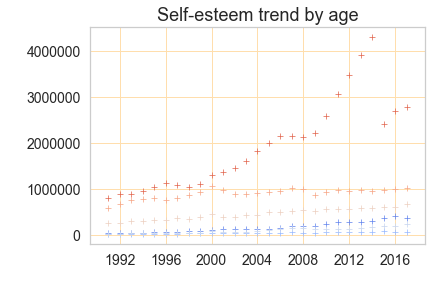

In [184]:
# plot graphs here
sns.scatterplot(data=SA, x=SA.index, y="Patent and trademark applications", marker = "+")
sns.scatterplot(data=SuSA, x=SuSA.index, y="Patent and trademark applications", marker = "+")
sns.scatterplot(data=MENA, x=MENA.index, y="Patent and trademark applications", marker = "+")    
sns.scatterplot(data=LAC, x=LAC.index, y="Patent and trademark applications", marker = "+") 
sns.scatterplot(data=EUA, x=EUA.index, y="Patent and trademark applications", marker = "+") 
sns.scatterplot(data=EAP, x=EAP.index, y="Patent and trademark applications", marker = "+") 

plt.title("Self-esteem trend by age", fontsize=18)
plt.xlabel(" ", fontsize=16)
plt.ylabel(" ", fontsize=16)


plt.grid(axis="both", color='navajowhite')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### prediction
#### linear regression - predicting patent number for the next three years for each income group

In [107]:
# reset index for seleciton
df_income.reset_index(inplace=True)

# create df for income
h_income = df_income[df_income["income_group"]=="High income"].groupby("year").sum()["Trademark applications, total"]
um_income = df_income[df_income["income_group"]=="Upper middle income"].groupby("year").sum()["Trademark applications, total"]
lm_income = df_income[df_income["income_group"]=="Lower middle income"].groupby("year").sum()["Trademark applications, total"]
l_income = df_income[df_income["income_group"]=="Low income"].groupby("year").sum()["Trademark applications, total"]


In [80]:
# selected variables from OLS: 
reg_data = df[df["income_group"]=="Low income"].groupby("year").sum()
lst = ["Charges for the use of intellectual property, payments (BoP, current US$)",
       "High-technology exports (current US$)", 
       "Scientific and technical journal articles", 
      "Trademark applications, total"]
reg_data = reg_data[lst]

In [81]:
# data normalisation
reg_data['High-technology exports (current US$)'] = reg_data['High-technology exports (current US$)']/100000
reg_data['Charges for the use of intellectual property, payments (BoP, current US$)'] = reg_data['Charges for the use of intellectual property, payments (BoP, current US$)']/100000
reg_data['Scientific and technical journal articles'] = reg_data['Scientific and technical journal articles']/1000
reg_data["Trademark applications, total"] = reg_data["Trademark applications, total"]/1000

In [92]:
# Importing all the required libraries to create a Linear Regression Model from Sklearn 
from sklearn.model_selection import train_test_split

# defining X and y
y = reg_data[["Trademark applications, total"]]

X = reg_data[["Charges for the use of intellectual property, payments (BoP, current US$)",
       "High-technology exports (current US$)", 
       "Scientific and technical journal articles"]]

# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [93]:
# Importing all the required libraries to create a Linear Regression Model from Sklearn 
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y_pred = model.predict(X_test)

In [192]:
X_test

Charges for the use of intellectual property, payments (BoP, current US$)  \
year                                                                                    
1998-01-01                                         191.796011                           
2010-01-01                                        1127.966971                           
2011-01-01                                         799.863754                           
2012-01-01                                         581.211836                           
1992-01-01                                          61.029855                           
2005-01-01                                         568.018641                           

            High-technology exports (current US$)  \
year                                                
1998-01-01                              235.64318   
2010-01-01                              952.24211   
2011-01-01                             3375.22410   
2012-01-01                             3937.48122   
1992-01-01                               24.25961   
2005-01-01                              635.59304   

            Scientific and technical journal articles  
year                                                   
1998-01-01                                     0.0000  
2010-01-01                                     2.9820  
2011-01-01                                     3.2679  
2012-01-01                                     3.6669  
1992-01-01                                     0.0000  
2005-01-01                                     1.7308

In [95]:
y_pred_train_linear = model.predict(X_train)

In [96]:
r2_score(y_train, y_pred_train_linear)

0.5521283912309801

In [97]:
r2_score(y_test, y_pred)

0.3845129182690096

In [99]:
y_test

Trademark applications, total
year                                     
1998-01-01                         12.412
2010-01-01                         17.132
2011-01-01                         20.717
2012-01-01                         23.141
1992-01-01                          3.933
2005-01-01                         19.741

Text(0.5, 1.0, 'Scatter plot for quality target test and predicted values')

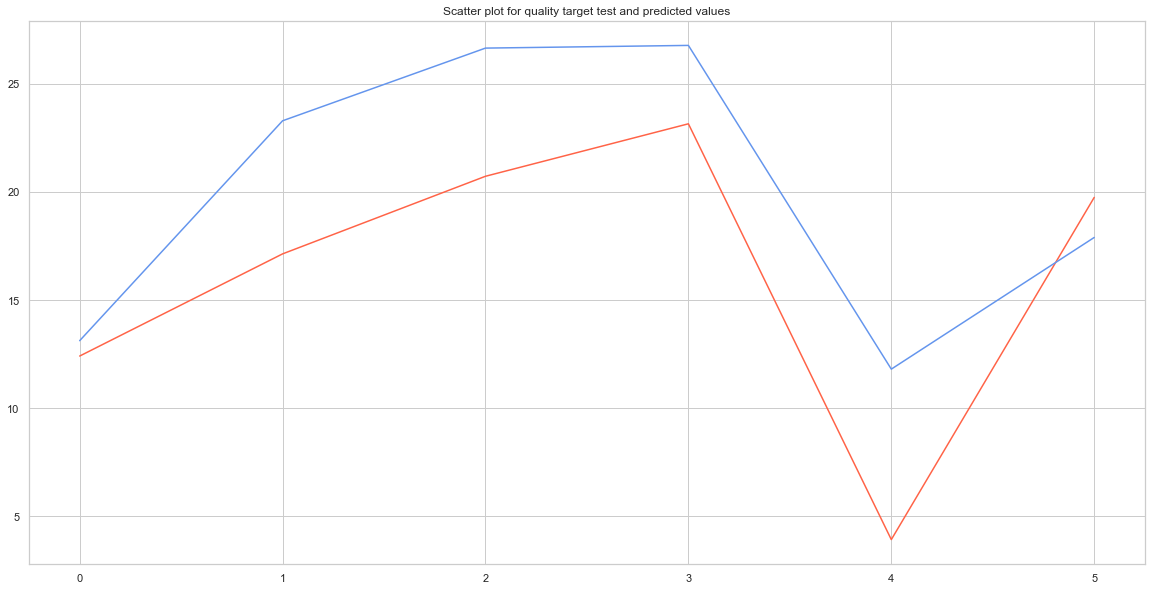

In [108]:
import math

# Setting the figure and creating a figure with figure size (20,10)
plt.figure(figsize=(20,10))

# In the same figure, we will plot the quality target test data and the y_predicted values. 

# Plotting diabetes target test observations 
plt.plot(range(y_test.shape[0]), y_test["Trademark applications, total"], color='tomato')

# Plotting diabetes y predicted values. 
plt.plot(range(y_pred.shape[0]), y_pred, color='cornflowerblue')

# Setting aesthetics of the figure 
plt.title('Scatter plot for quality target test and predicted values')

We see, that the model is not too bad when we look at the data, even if there is a bit of underfitting.

As we do not have more data to predict future data I will leave this model at this. 

For predictions over time, an ARIMA model should be used. 

I will add that to the list of **future work** and stick to the growth prediction by gradient of line of best fit. 

## Conclusions

## Links for resources

- A similar analysis, which inspired part of the research, analysing the digital economy can be found [here](http://www.oecd.org/sti/world-top-rd-investors.pdf). 
- For more information on the distribution of papets visit the [WIPO webpage.](https://www.wipo.int/edocs/infogdocs/en/ipfactsandfigures2018/)
- More reports on innovation, patents, and R&D [here](https://www.wipo.int/edocs/pubdocs/en/wipo_pub_941_2018.pdf)